In [1]:
# September 4, 2017
# Udemy Machine Learning A-Z Course
# Multiple Linear Regression

In [34]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import pandas as pd

In [35]:
# Importing Data

dataset = pd.read_csv('50_Startups.csv')

In [36]:
dataset.head(n = 5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
# Setting up x and y's

x = dataset.iloc[:, : - 1].values
y = dataset.iloc[:, -1].values

In [38]:
# Encoding Categorical Variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

xlabelencoder = LabelEncoder()

x[:, -1] = xlabelencoder.fit_transform(x[:, -1]) # converts categories into numbers

ohe = OneHotEncoder(categorical_features = [3]) # creates dummy variables for each category

x = ohe.fit_transform(x).toarray() # moves the DVs to the front of the matrix

In [39]:
# Avoiding DV Trap

x = x[:, 1:] # the "1: " means, take all columns beginnging from column 1
             # remember that python has 0 indexing

In [40]:
# Train and Test Sets

from sklearn.cross_validation import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,
                                                y,
                                                test_size = 0.2,
                                                random_state = 0)

In [41]:
# Regression (remember do not need to do feature scaling b/c library will do it already)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # creating object of linear regression class

regressor.fit(xtrain, 
              ytrain)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
# Testing

ypred = regressor.predict(xtest)

In [43]:
# Results

ypred

array([ 103015.20159796,  132582.27760815,  132447.73845175,
         71976.09851258,  178537.48221056,  116161.24230166,
         67851.69209676,   98791.73374687,  113969.43533013,
        167921.06569551])

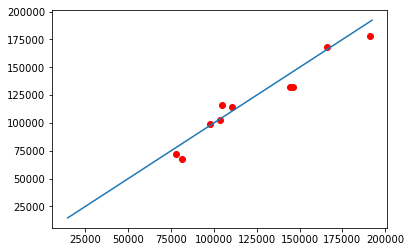

In [44]:
# Plots

plt.scatter(ytest,
            ypred,
            color = 'red')

plt.plot([
          min(min(ytrain), min(ytest)), 
          max(max(ytrain), max(ytest))
         ], 
         [
          min(min(ytrain), min(ytest)), 
          max(max(ytrain), max(ytest))
         ])

In [45]:
# NOTE: statsmodels library will not include intercept, must add column of 1's

# numpy.append appends to the end of the matrix, so in example below
# we are appending matrix x to the column of 1's
# np.append(arr = [original data], 
#           values = [new data to append to original],
#           axis = 1) # for column, = 0 for line

x = np.append(arr = np.ones((len(x), 1)).astype(int), 
              values = x,
              axis = 1) # axis = 1 for column, = 0 for line 

In [52]:
# Backward Elimination

import statsmodels.formula.api as sm

xopt = x[:, [0, 1, 2, 3, 4, 5]]

regOLS = sm.OLS(endog = y,
                exog = xopt).fit()

regOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 05 Sep 2017   Prob (F-statistic):           1.34e-27
Time:                        11:15:12   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
xopt = x[:, [0, 1, 3, 4, 5]]

regOLS = sm.OLS(endog = y,
                exog = xopt).fit()

regOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 05 Sep 2017   Prob (F-statistic):           8.49e-29
Time:                        11:15:13   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
xopt = x[:, [0, 3, 4, 5]]

regOLS = sm.OLS(endog = y,
                exog = xopt).fit()

regOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 05 Sep 2017   Prob (F-statistic):           4.53e-30
Time:                        11:15:13   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
xopt = x[:, [0, 3, 5]]

regOLS = sm.OLS(endog = y,
                exog = xopt).fit()

regOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 05 Sep 2017   Prob (F-statistic):           2.16e-31
Time:                        11:15:14   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
xopt = x[:, [0, 3]]

regOLS = sm.OLS(endog = y,
                exog = xopt).fit()

regOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 05 Sep 2017   Prob (F-statistic):           3.50e-32
Time:                        11:15:17   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""